Monte Carlo method to get the value of pi

In [153]:
import numpy as np
from matplotlib import pyplot as plt

N = 10000
random_number = np.random.random([N, 2])
L2_norm = np.sum(random_number ** 2, axis = 1) #Note the difference between axis 0 and 1

judge = L2_norm <= 1.0
pi = np.sum(judge)*4/N

print(pi, np.pi)

3.1512 3.141592653589793


Monte Carlo integration(rough version)

In [154]:
def f(x):
    return x**2 + 1

N = 10000
a = 2
b = 5
interval = np.linspace(a, b, 10000)

def integral(interval, N):
    result = 0
    delta = interval[1] - interval[0]
    for i in range(N):
        result += f(interval[i]) * delta
    return result

integral(interval, N)

42.00465051005174

In [155]:
x = np.random.random([N,1])
interval = a + (b-a)*x
def MC_integral(interval, N, a, b):
    return np.sum(f(interval) * (b-a))/N

MC_integral(interval, N, a, b)


42.10501187172323

MCMC(Metropolis-Hastings algorithm)

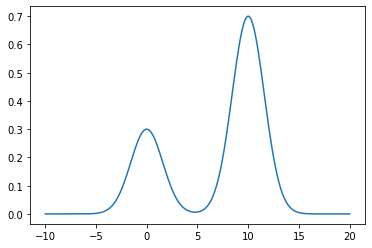

In [156]:
def p(x):
    return 0.3 * np.exp(-0.2*x**2) + 0.7*np.exp(-0.2*(x-10)**2)
    #return np.exp(-x**2) 
interval = np.linspace(-10, 20, N)

plt.plot(interval, p(interval))

(array([  2.,   3.,   2.,  11.,  11.,  18.,  17.,  44.,  45.,  57.,  69.,
         96., 123., 175., 247., 346., 400., 451., 517., 489., 400., 335.,
        284., 396., 548., 779., 733., 691., 554., 435., 340., 312., 250.,
        160., 138., 102.,  99.,  97.,  67.,  25.,  31.,  30.,  22.,  11.,
          7.,  11.,   6.,   5.,   6.,   3.]),
 array([-23.38128549, -22.11530222, -20.84931896, -19.5833357 ,
        -18.31735243, -17.05136917, -15.78538591, -14.51940264,
        -13.25341938, -11.98743612, -10.72145286,  -9.45546959,
         -8.18948633,  -6.92350307,  -5.6575198 ,  -4.39153654,
         -3.12555328,  -1.85957001,  -0.59358675,   0.67239651,
          1.93837978,   3.20436304,   4.4703463 ,   5.73632957,
          7.00231283,   8.26829609,   9.53427935,  10.80026262,
         12.06624588,  13.33222914,  14.59821241,  15.86419567,
         17.13017893,  18.3961622 ,  19.66214546,  20.92812872,
         22.19411199,  23.46009525,  24.72607851,  25.99206178,
         27.258045

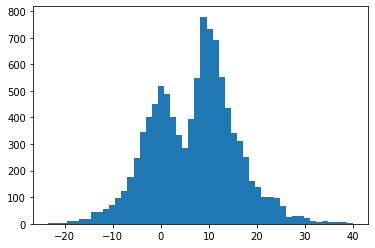

In [157]:
x = [0]
sigma = 2
N = 10000

def gaussian_normal(x, mean, sigma):
    return 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-1/2 * ((x-mean)/sigma)**2)

def MCMC_Metropolis_Hastings_method(p, N):
    for i in range(N-1):
        u = np.random.normal(0, 1)
        x_new = np.random.normal(x[i], sigma)
        A = p(x_new) * gaussian_normal(x[i], x_new, sigma)
        B = p(x[i]) * gaussian_normal(x_new, x[i], sigma)
        Amp = min([1, A/B])
        if u < Amp:
            x.append(x_new)
        else:
            x.append(x[i])
            
    return plt.hist(x, bins=50)
    
        
MCMC_Metropolis_Hastings_method(p, N)

/Users/jangho/opt/anaconda3/envs/BNN/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jangho/opt/anaconda3/envs/BNN/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


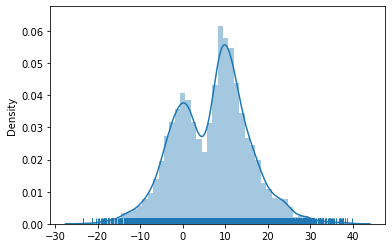

In [158]:
import seaborn as sns
sns.distplot(x, rug=True)
plt.show()